In [ ]:
'''
import zipfile,os

local_zip = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready-20201220T005053Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Image Processing Shift Academy')
zip_ref.close()
'''

"\nimport zipfile,os\n\nlocal_zip = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready-20201220T005053Z-001.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/content/drive/MyDrive/Image Processing Shift Academy')\nzip_ref.close()\n"

# PreProcessing Image

## Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import os,glob
from keras import applications

## Load data from GDrive

In [ ]:
train_dir = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/train'
val_dir = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/validation'
test_dir = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/test'

## Menghitung jumlah dataset

In [ ]:
def get_files(dir):
  if not os.path.exists(dir):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(dir):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr +'/*')))
  return count

In [ ]:
data_training = get_files(train_dir)
data_val = get_files(val_dir)
data_test = get_files(test_dir)
num_classes = len(glob.glob(train_dir + "/*"))

print('jumlah data training :',data_training)
print('jumlah data val :',data_val)
print('jumlah data testing :',data_test)
print('jumlah keals dataset :',num_classes)

jumlah data training : 5681
jumlah data val : 1620
jumlah data testing : 810
jumlah keals dataset : 9


## Preprocessing Data Input

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1/255,
                horizontal_flip=True,
                zoom_range = 0.3
                )

test_datagen = ImageDataGenerator(
                rescale = 1/255
                )

val_datagen = ImageDataGenerator(
                rescale = 1/255,
                horizontal_flip=True,
                zoom_range = 0.3
                )

## Mengatur Ukuran dari image/citra input

In [ ]:
image_width = 224
image_height = 224

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (image_width,image_height),
                    color_mode = 'rgb'
                    )

val_generator = val_datagen.flow_from_directory(
                  val_dir,
                  target_size = (image_width,image_height),
                  color_mode = 'rgb'   
                  )

test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size=(image_width,image_height),
                  color_mode = 'rgb',
                  shuffle=False
                  )

Found 5681 images belonging to 9 classes.
Found 1620 images belonging to 9 classes.
Found 810 images belonging to 9 classes.


In [ ]:
train_generator.class_indices

{'bacterial_spot': 0,
 'early_blight': 1,
 'healthy': 2,
 'late_blight': 3,
 'leaf_mold': 4,
 'septoria_leaf_spot': 5,
 'spotted_spider_mite': 6,
 'target_spot': 7,
 'yellow_leaf_curl_virus': 8}

## Build CNN Architecture

In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten
from keras.utils import plot_model
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization,Dropout,AveragePooling2D,BatchNormalization



In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(image_width, image_height, 3), padding='same', strides=1, activation='relu', name='konvolusi_1'))
model.add(Conv2D(64, (3, 3), padding='same', strides=1, activation='relu', name='konvolusi_1.1'))
model.add(MaxPooling2D(pool_size = (2, 2), name='pool_layer_1'))


model.add(Conv2D(32, (5,5), padding='same', strides=1, activation='relu', name='konvolusi_2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool_layer_2'))


model.add(Flatten())

model.add(Dense(128, activation='relu', name='ANN_1'))
model.add(Dense(num_classes, activation='softmax', name='Output'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
konvolusi_1 (Conv2D)         (None, 224, 224, 64)      1792      
_________________________________________________________________
konvolusi_1.1 (Conv2D)       (None, 224, 224, 64)      36928     
_________________________________________________________________
pool_layer_1 (MaxPooling2D)  (None, 112, 112, 64)      0         
_________________________________________________________________
konvolusi_2 (Conv2D)         (None, 112, 112, 32)      51232     
_________________________________________________________________
pool_layer_2 (MaxPooling2D)  (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
ANN_1 (Dense)                (None, 128)              

In [ ]:
plot_model(model, show_layer_names=True, show_shapes=True, to_file='ini_model.png')

In [ ]:
from keras.preprocessing import image
import numpy as np

img1 = image.load_img('/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/train/healthy/0372686b-04b2-4a25-98da-5801747fa1af___RS_HL 0391.JPG')
plt.imshow(img1)

img1 = image.load_img('/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/train/healthy/0372686b-04b2-4a25-98da-5801747fa1af___RS_HL 0391.JPG', target_size=(image_width, image_height, 1), color_mode='rgb')
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
import matplotlib.image as mpig
from keras.models import  Model

conv_output = Model(inputs=model.input, outputs=model.get_layer('konvolusi_1').output)
conv_features = conv_output.predict(img)

fig = plt.figure(figsize= (28, 14))
columns = 4
rows = 4
#rows dan columnya dimasukkannya bebas , asal bila dikali hasilnya sama dengan filter yang ada pada konvulsi_1

for i in range (columns*rows):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('filter ke-' + str(i))
  plt.imshow(conv_features[0, :, :, i])
plt.show

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32

train = model.fit(train_generator,
                            epochs=10,
                            steps_per_epoch = train_generator.samples // batch_size,
                            validation_data = val_generator,
                            validation_steps = val_generator.samples // batch_size,
                            verbose = 1)

Epoch 1/10
177/177 [==============================] - 97s 542ms/step - loss: 2.2250 - accuracy: 0.1981 - val_loss: 1.5085 - val_accuracy: 0.4663
Epoch 2/10
177/177 [==============================] - 96s 544ms/step - loss: 1.4253 - accuracy: 0.4927 - val_loss: 1.0927 - val_accuracy: 0.6338
Epoch 3/10
177/177 [==============================] - 96s 542ms/step - loss: 1.0893 - accuracy: 0.6093 - val_loss: 0.8874 - val_accuracy: 0.6787
Epoch 4/10
177/177 [==============================] - 95s 537ms/step - loss: 0.9335 - accuracy: 0.6548 - val_loss: 0.9997 - val_accuracy: 0.6375
Epoch 5/10
177/177 [==============================] - 95s 536ms/step - loss: 0.7972 - accuracy: 0.7143 - val_loss: 0.8176 - val_accuracy: 0.7106
Epoch 6/10
177/177 [==============================] - 94s 532ms/step - loss: 0.7571 - accuracy: 0.7193 - val_loss: 0.8807 - val_accuracy: 0.6744
Epoch 7/10
 10/177 [>.............................] - ETA: 1:09 - loss: 0.7602 - accuracy: 0.6987

KeyboardInterrupt: ignored

## Plot Training Model

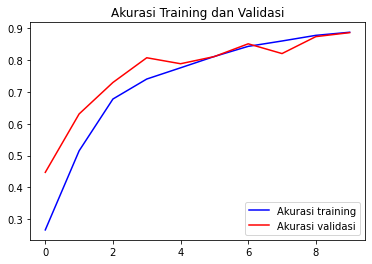

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(10)

# Plot akurasi data taraining dan validation
plt.plot(epochs, acc, 'b', label='Akurasi training')
plt.plot(epochs, val_acc, 'r', label='Akurasi validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend()



plt.show()

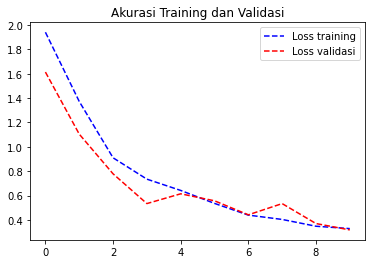

In [ ]:
# Plot loss taraining dan validation
plt.plot(epochs, loss, 'b', label='Loss training',linestyle='--')
plt.plot(epochs, val_loss, 'r', label='Loss validasi',linestyle='--')
plt.title('Akurasi Training dan Validasi')
plt.legend()
plt.show()

## Save model

In [ ]:
model.save('modelTomatoSA1.h5')

In [ ]:
model = keras.models.load_model('/content/modelTomatoVGG16.h5')

In [ ]:
actual = test_generator.classes
actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
predicted = model.predict_classes(test_generator,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


26/26 [==============================] - 3s 103ms/step


In [ ]:
predicted

array([0, 7, 0, 8, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 7, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 7, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 7,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 7, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2,

In [ ]:
predicted.shape

(810,)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {'y_aktual':actual,
        'y_predicted' : predicted}

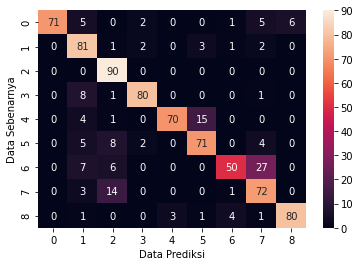

In [ ]:
df = pd.DataFrame(data,columns=['y_aktual','y_predicted'])
confusion_matrix2 = pd.crosstab(df['y_aktual'],df['y_predicted'],rownames=['Data Sebenarnya'],colnames=['Data Prediksi'])

sns.heatmap(confusion_matrix2,annot=True,fmt='.0f')
plt.show()

In [ ]:
confusion_matrix(actual,predicted)

array([[81,  5,  0,  0,  0,  0,  0,  3,  1],
       [ 3, 79,  1,  1,  0,  5,  0,  1,  0],
       [ 0,  0, 90,  0,  0,  0,  0,  0,  0],
       [ 2, 19,  0, 64,  0,  4,  0,  1,  0],
       [ 2,  7,  0,  0, 68, 13,  0,  0,  0],
       [ 1,  5,  2,  3,  0, 77,  0,  2,  0],
       [ 0,  5,  6,  0,  1,  5, 42, 31,  0],
       [ 0,  1, 23,  0,  0,  2,  1, 63,  0],
       [ 6,  3,  0,  0,  0,  0,  4,  0, 77]])

In [ ]:
precision_score(actual,predicted,average='macro')

0.8425151343058132

In [ ]:
recall_score(actual,predicted,average='macro')

0.8209876543209877

In [ ]:
accuracy_score(actual,predicted)

0.8209876543209876

In [ ]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        90
           1       0.71      0.90      0.79        90
           2       0.74      1.00      0.85        90
           3       0.93      0.89      0.91        90
           4       0.96      0.78      0.86        90
           5       0.79      0.79      0.79        90
           6       0.88      0.56      0.68        90
           7       0.64      0.80      0.71        90
           8       0.93      0.89      0.91        90

    accuracy                           0.82       810
   macro avg       0.84      0.82      0.82       810
weighted avg       0.84      0.82      0.82       810



In [ ]:
Classes = ['bacterial_spot',
           'early_blight',
           'healthy',
           'late_blight',
           'leaf_mold',
           'septoria_leaf_spot',
           'spotted_spider_mite',
           'target_spot',
           'yellow_leaf_curl_virus'
            ]

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

import numpy as np

def prepare(img_path):
  img = image.load_img(img_path, target_size=(224,224,3), color_mode='rgb')
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

In [ ]:
citra_test = '/content/drive/MyDrive/Image Processing Shift Academy/tomato_disease_ready/test/target_spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG'

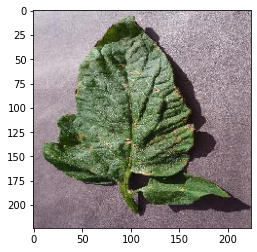

In [ ]:
disease = image.load_img(citra_test, target_size=(224,224,3), color_mode='rgb')
plt.imshow(disease)

In [ ]:
hasil_akhir = model.predict_classes(prepare(citra_test))
hasil_akhir_2 = model.predict(prepare(citra_test))
index = np.argsort(hasil_akhir_2[0,:])

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Diagnosis Penyakit pada tanaman Tomat')
print('         by ShiftAcademy             ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('')
print('Hasil Deteksi :')
print('')
print('          ', Classes[int(hasil_akhir)])
print('')
print('')
print(Classes[index[8]], "--------------------probabilitas :", hasil_akhir_2[0, index[8]])
print(Classes[index[7]], "--------------------probabilitas :", hasil_akhir_2[0, index[7]])
print(Classes[index[6]], "--------------------probabilitas :", hasil_akhir_2[0, index[6]])
print(Classes[index[5]], "--------------------probabilitas :", hasil_akhir_2[0, index[5]])
print(Classes[index[4]], "--------------------probabilitas :", hasil_akhir_2[0, index[4]])
print(Classes[index[3]], "--------------------probabilitas :", hasil_akhir_2[0, index[3]])
print(Classes[index[2]], "--------------------probabilitas :", hasil_akhir_2[0, index[2]])
print(Classes[index[1]], "--------------------probabilitas :", hasil_akhir_2[0, index[1]])
print(Classes[index[0]], "--------------------probabilitas :", hasil_akhir_2[0, index[0]])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Diagnosis Penyakit pada tanaman Tomat
         by ShiftAcademy             
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Hasil Deteksi :

           target_spot


target_spot --------------------probabilitas : 0.96845263
healthy --------------------probabilitas : 0.028474273
spotted_spider_mite --------------------probabilitas : 0.0016163003
early_blight --------------------probabilitas : 0.0014565527
late_blight --------------------probabilitas : 1.1979982e-07
septoria_leaf_spot --------------------probabilitas : 1.1524476e-07
leaf_mold --------------------probabilitas : 5.601146e-09
yellow_leaf_curl_virus --------------------probabilitas : 9.5221026e-11
bacterial_spot --------------------probabilitas : 1.1140604e-13


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
